In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

## profiling

In [8]:
#model = 'resnet50'
#model = 'resnet152'
model = 'vgg16'

In [9]:
dram_r_df = pd.read_csv('./src/'+model+'/dram_read.csv')
dram_r_df = dram_r_df.drop(0)
dram_r_df = dram_r_df.reset_index(drop=True)

dram_w_df = pd.read_csv('./src/'+model+'/dram_write.csv')
dram_w_df = dram_w_df.drop(0)
dram_w_df = dram_w_df.reset_index(drop=True)

# f [0-93)
# b [127-352)
# drop = [93-127)


In [10]:
dram_r_df = dram_r_df.drop(index = list(range(93,127))+list(range(352,len(dram_r_df))))
dram_w_df = dram_w_df.drop(index = list(range(93,127))+list(range(352,len(dram_w_df))))

In [11]:
dram_r_df = dram_r_df.reset_index(drop=True)
dram_w_df = dram_w_df.reset_index(drop=True)

# f [0-92]
# b [93 - :]

In [12]:
dram_r_comp, dram_r_comm, delimeter1 = separate_streams(dram_r_df, 'dram_read_transactions')

TypeError: separate_streams() missing 1 required positional argument: 'delimeter'

In [11]:
dram_w_comp, dram_w_comm, delimeter2 = separate_streams(dram_w_df, 'dram_write_transactions')

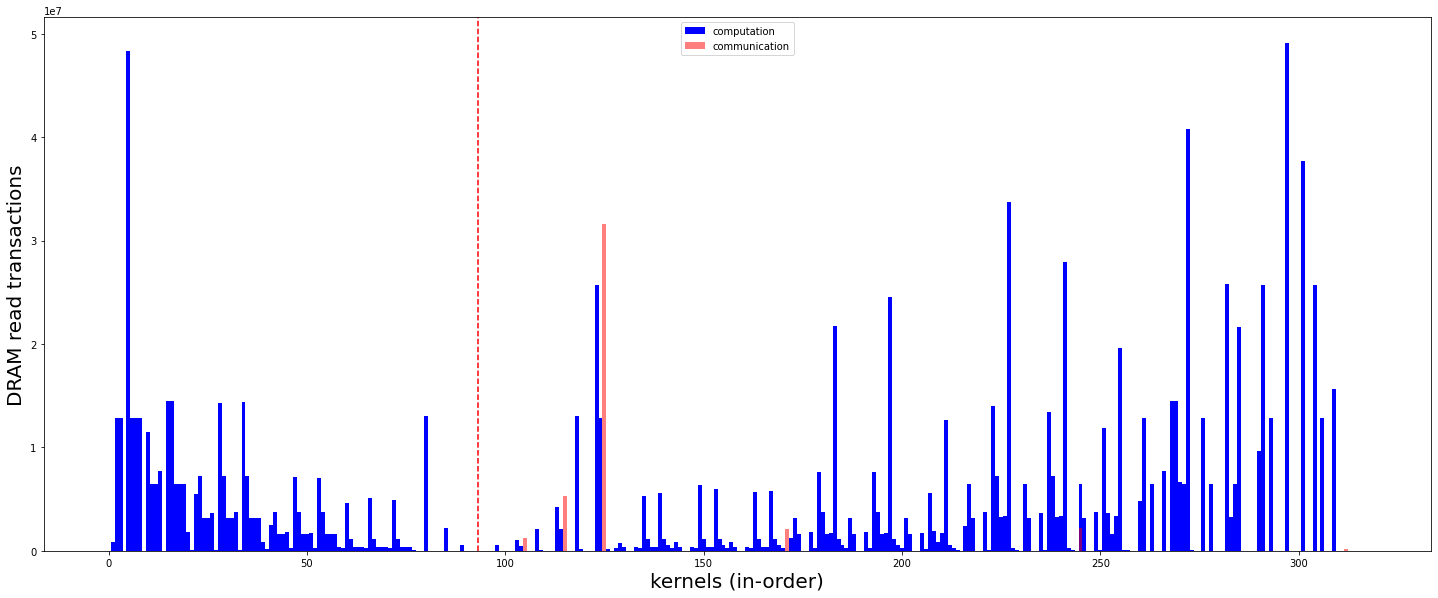

In [12]:
plot_bar_overlap(dram_r_comp, dram_r_comm, delimeter1, 'DRAM read transactions', 'kernels (in-order)')

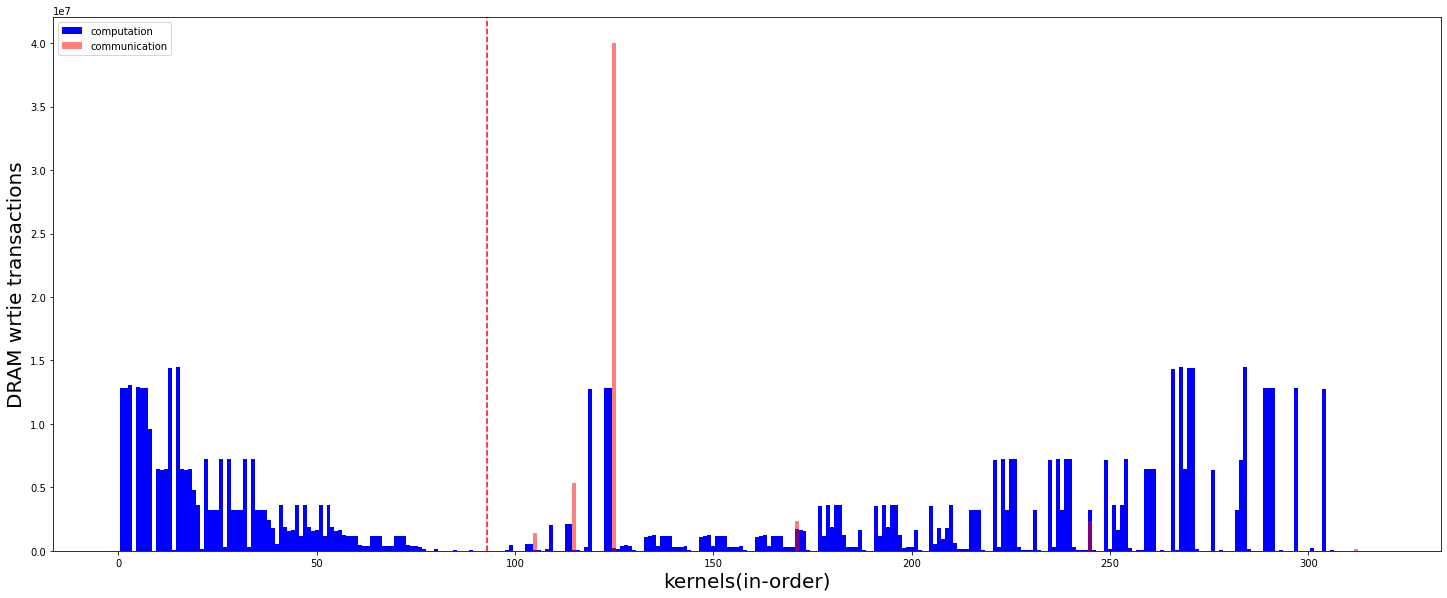

In [13]:
plot_bar_overlap(dram_w_comp, dram_w_comm, delimeter2, 'DRAM wrtie transactions', 'kernels(in-order)')